In [4]:
import pandas as pd
import time
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../../dados/procucao_gado_MS.csv', sep=';')

In [5]:
df.head(5)

,tipificacao_1,tipificacao_2,tipificacao_3,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,...,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
0,1,0,0,1,3,345.4,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
1,1,0,0,1,3,268.8,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
2,1,0,0,1,3,288.4,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
3,1,0,0,1,3,357.2,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
4,1,0,0,1,3,267.6,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2


In [6]:
SEED = 42
y = df['categoria']
X = df.drop(['categoria', 'classificacao'],axis=1)

In [6]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

In [7]:
# definindo nossas etapas do pipeline
reduzDimPCA = PCA(n_components=30)
scaler = StandardScaler()
rfc_baseline = RandomForestClassifier(random_state=SEED)


In [8]:
# criando o modelo usando pipeline
model= make_pipeline(reduzDimPCA,
                     scaler,
                     rfc_baseline)

In [9]:
# Obtendo scores da validação cruzada com o pipeline criado
scores = cross_val_score(model, X, y, cv=skfolds)
scores

array([0.99684684, 0.99719025, 0.99676359, 0.9969405 , 0.99661789,
       0.99668033, 0.99665952, 0.9969405 , 0.99668033, 0.99691965])

In [10]:
print('Acurária %.3f +/- %.2f' % (scores.mean(), scores.std()))

Acurária 0.997 +/- 0.00


In [26]:
feature_names = X.columns

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [13]:
rfc = RandomForestClassifier(random_state=SEED)

In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred=rfc.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [16]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.096 seconds


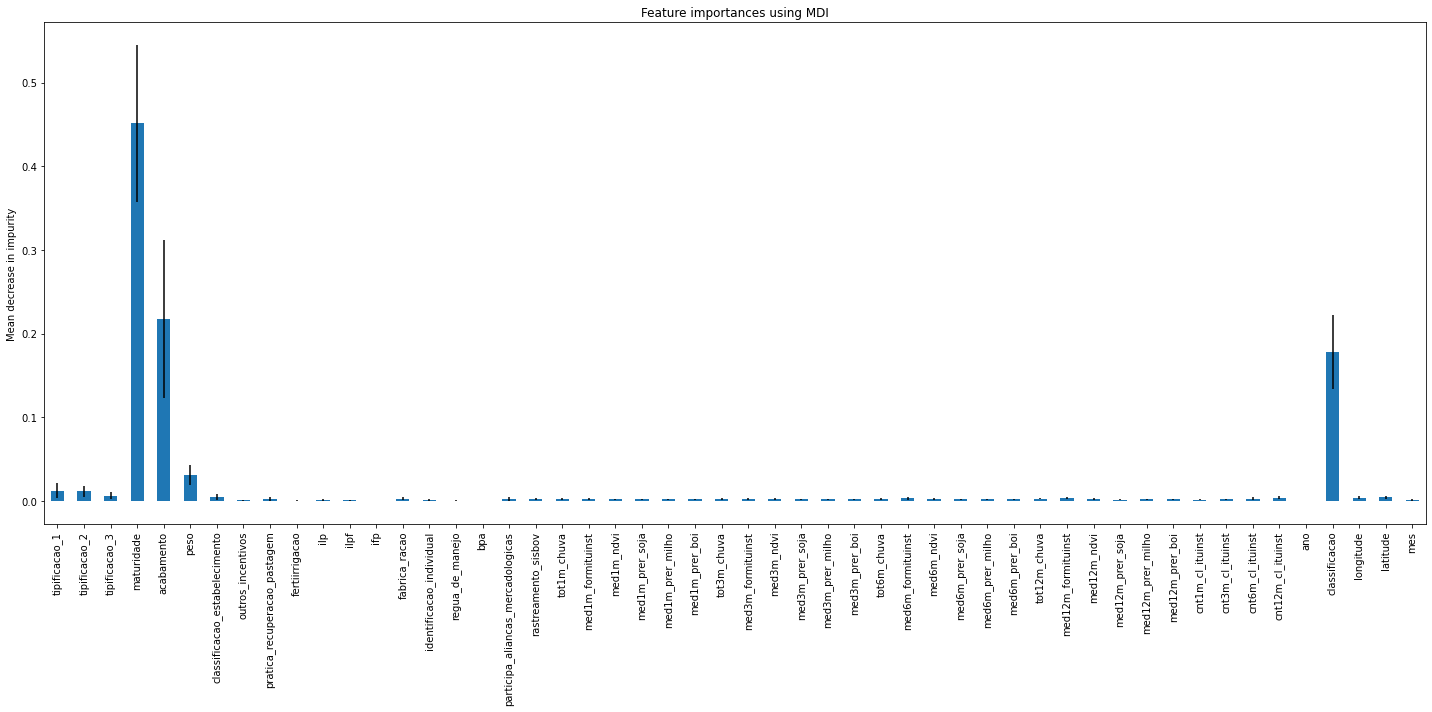

In [41]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(20, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [43]:
SEED = 42
y = df['categoria']
X = df.drop(['categoria','maturidade'],axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [48]:
rfc_test = RandomForestClassifier(random_state=SEED)
rfc_test.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred=rfc_test.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6832851166566071


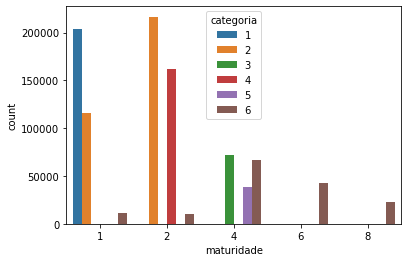

In [5]:
sns.countplot(x="maturidade", hue="categoria", data=df)
plt.show()  

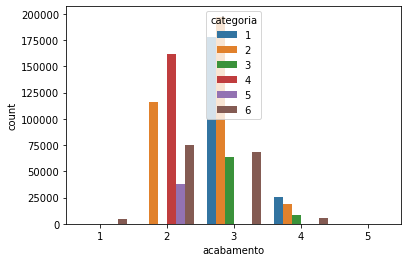

In [7]:
sns.countplot(x="acabamento", hue="categoria", data=df)
plt.show() 